In [2]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

import os
import glob
import re

In [3]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_file = None

# Find all grid_results joblib files in the results folder
pattern = r'grid_results_\d+_[\d.e+-]+\.joblib'


# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern
result_files = [file for file in result_files if re.search(pattern, file)]
print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = joblib.load(file_path)
    
    key = next(iter(result.keys()))
    print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_file = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_file}")
print(f"{'='*50}")


['../results/grid_results_2_5e-05.joblib', '../results/grid_results_8_5e-05.joblib', '../results/grid_results_4_1e-05.joblib', '../results/grid_results_4_0.0001.joblib', '../results/grid_results_4_5e-05.joblib', '../results/grid_results_8_1e-05.joblib', '../results/grid_results_8_0.0001.joblib', '../results/grid_results_2_0.0001.joblib', '../results/grid_results_2_1e-05.joblib']
Key: (2, 5e-05):  0.7518215584754944
Key: (8, 5e-05):  0.6756670641899108
Key: (4, 1e-05):  0.9892435526847839
Key: (4, 0.0001):  0.6856128839651744
Key: (4, 5e-05):  0.7159161039193471
Key: (8, 1e-05):  0.8203065661589305
Key: (8, 0.0001):  0.6561467508474986
Key: (2, 0.0001):  0.7082371592521668
Key: (2, 1e-05):  2.3023274461428325

Best validation loss: 0.6561467508474986
Best file: (8, 0.0001)


In [4]:
all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)
all_keys = np.array(all_keys)

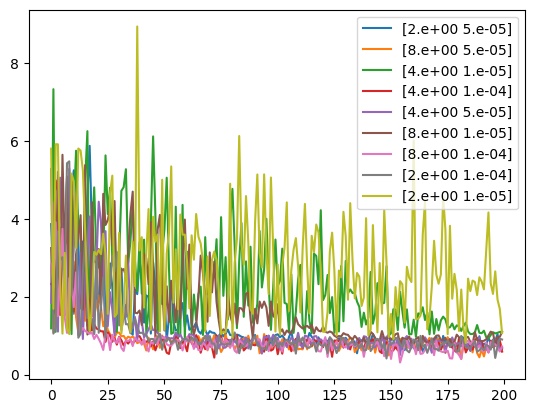

In [5]:
fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

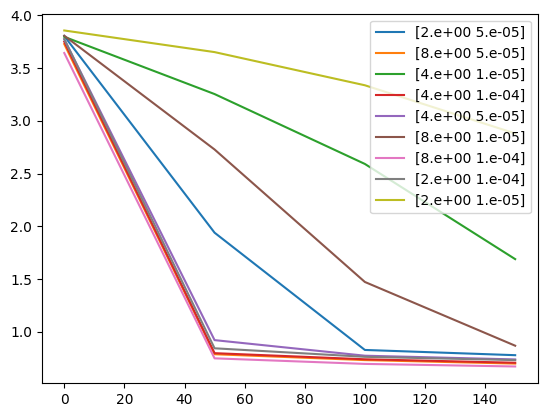

In [6]:
fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

In [15]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_file = None

# Pattern to match files of the form grid_results_NUMBER.joblib
pattern = r'grid_results_\d+\.joblib'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)]

print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = joblib.load(file_path)
    
    key = next(iter(result.keys()))
    print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_file = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_file}")
print(f"{'='*50}")


['../results/grid_results_128.joblib', '../results/grid_results_768.joblib', '../results/grid_results_512.joblib']
Key: 128:  0.8876906878948212
Key: 768:  0.6579924559593201
Key: 512:  0.6917668747901916

Best validation loss: 0.6579924559593201
Best file: 768


In [17]:
all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)

In [18]:
all_train_loss.shape

(3, 200, 2)

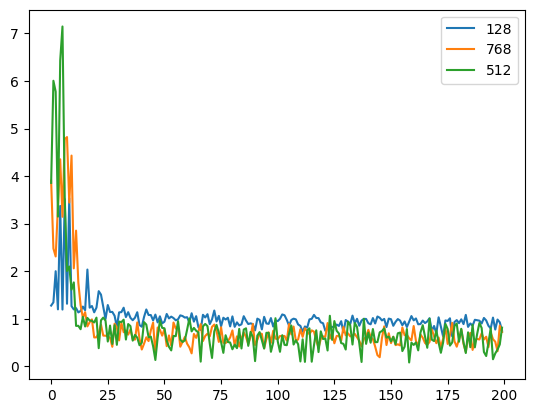

In [19]:
fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

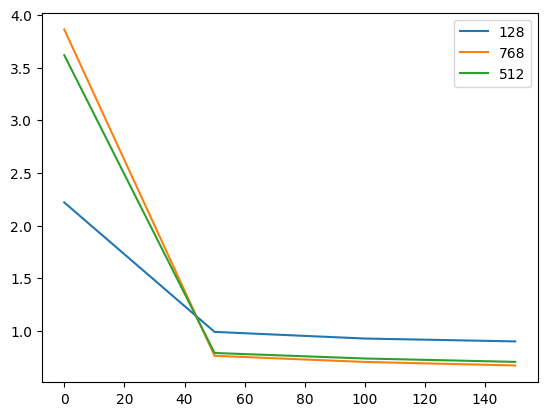

In [20]:
fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()